This notebook contains code to compare motif-specific dinucleotide mutation rates inferred from SISTR2 versus SSC de novo mutations

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Input per-locus info
LOCFILE = "/gymreklab-tscc/yal084/storage/ileena/ssc-gangstr-denovos/denovos_GW_priors_Jan20/combined/SSC_allphases_011720_denovos_GW_priors_Jan20.locus_stats.tab"

# Make editable in Illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Imports
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats

# Other data paths
ANNOTFILE = "/storage/mgymrek/ssc-denovos/annotations/hg38_gangstr_MasterAnnotation-rmdup.bed"
CODISFILE = "/storage/mgymrek/workspace/ssc-denovos/metadata/codis_hg38.csv"
NISTFILE = "/storage/ileena/denovos4/annotations/nist_codis_info.txt"
MUTEAFILE = "/storage/mgymrek/ssc-denovos/mutea/MUTEA_MutationRates_hg38_GangSTR.bed"

# Color keys
colors = ['gray','red','gold','blue','green','purple','brown','salmon','magenta','cyan','darkblue']

# Output path info
OUTDIR = "pdfs/"

PLOTDIR = 'pdfs-round1'
SUPP_PREFIX = 'SuppFig-9'

In [7]:
# Load per-locus mutation info
data = pd.read_csv(LOCFILE, delim_whitespace=True)

# Load annotation info
annot = pd.read_csv(ANNOTFILE, sep="\t")

# Set up fields
def GetChrom(x):
    if "chr" in str(x): return int(x[3:])
    else: return int(x)
data["chrom"] = data["chrom"].apply(GetChrom)
annot = annot[annot["chrom"].apply(lambda x: x not in ["X","chrX","Y","chrY"])]
annot["chrom"] = annot["chrom"].apply(GetChrom)
annot["pos"] = annot["start"]

# Merge
adata = pd.merge(data, annot[["chrom","pos","end","period","motif"]], on=["chrom","pos"])

In [8]:
MAX_LOG_MU = -3
MIN_LOG_MU = -8
def getMuList(x, mu, L, ru, per):
    mu_list = []
    for elem in x:
        
        log_mu = np.log10(mu)+L*(elem/per-ru)

        if log_mu < MIN_LOG_MU:
            log_mu = MIN_LOG_MU

        if log_mu > MAX_LOG_MU:
            log_mu = MAX_LOG_MU

        mu_list.append(log_mu)
    return mu_list

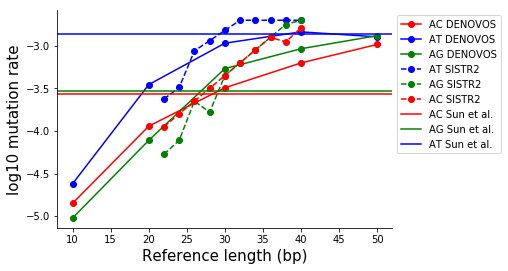

In [11]:
adata["reflen"] = adata["end"]-adata["pos"]+1
lenbins = np.arange(10, 61, 10)


mcolors = {
    "AC": "red",
    "AT": "blue",
    "AG": "green",
    "AAC": "pink",
    "AAT": "cyan",
    "AAG": "lightgreen"
}

# Use median mutation model, not maximum likelihood mutation model
#for period in range(1, 7):
fig = plt.figure()
ax = fig.add_subplot(111)

for motif in ["AC","AT","AG"]:
    muts = []
    for i in range(len(lenbins)-1):
        lb = lenbins[i]
        ub = lenbins[i+1]
        x = adata[(adata["motif"]==motif) & (adata["reflen"]>=lb) & (adata["reflen"]<ub)]
        muts.append(sum(x["mut_unaff"])*1.0/sum(x["all_unaff"]))
    ax.plot(lenbins[:-1], np.log10(muts), color=mcolors[motif], label=motif+' DENOVOS', marker="o")

x = np.arange(22, 42, 2)
y_AT = []
y_AC = []
y_AG = []

# AT - ddccccccdc
y_AT.append(getMuList([11*2], 10**-4.6, 0.135, 6, 2)[0])
y_AT.append(getMuList([12*2], 10**-4.6, 0.135, 6, 2)[0])
y_AT.append(getMuList([13*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([14*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([15*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([16*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([17*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([18*2], 10**-4.2, 0.12, 6, 2)[0])
y_AT.append(getMuList([19*2], 10**-4.6, 0.135, 6, 2)[0])
y_AT.append(getMuList([20*2], 10**-4.2, 0.12, 6, 2)[0])

# AG - ffefeeeeec
y_AG.append(getMuList([11*2], 10**-5.4, 0.165, 6, 2)[0])
y_AG.append(getMuList([12*2], 10**-5.4, 0.165, 6, 2)[0])
y_AG.append(getMuList([13*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([14*2], 10**-5.4, 0.165, 6, 2)[0])
y_AG.append(getMuList([15*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([16*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([17*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([18*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([19*2], 10**-5, 0.15, 6, 2)[0])
y_AG.append(getMuList([20*2], 10**-4.2, 0.12, 6, 2)[0])

# AC - eeeeeeeeff
y_AC.append(getMuList([11*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([12*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([13*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([14*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([15*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([16*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([17*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([18*2], 10**-5, 0.15, 6, 2)[0])
y_AC.append(getMuList([19*2], 10**-5.4, 0.165, 6, 2)[0])
y_AC.append(getMuList([20*2], 10**-5.4, 0.165, 6, 2)[0])

ax.plot(x,[item+np.log10(2) for item in y_AT], color='blue',marker = 'o',linestyle='dashed',label='AT SISTR2')
ax.plot(x,[item+np.log10(2) for item in y_AG], color='green',marker = 'o',linestyle='dashed',label='AG SISTR2')
ax.plot(x,[item+np.log10(2) for item in y_AC], color='red',marker = 'o',linestyle='dashed',label='AC SISTR2')

# Add Sun et al
ax.axhline(y=-3.56, color="red", label="AC Sun et al.")
ax.axhline(y=-3.53, color="green", label="AG Sun et al.")
ax.axhline(y=-2.86, color="blue", label="AT Sun et al.")

ax.set_xlabel("Reference length (bp)", size=15);
ax.set_ylabel("log10 mutation rate", size=15);
ax.legend(bbox_to_anchor=(1, 1))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');


plt.savefig(os.path.join(PLOTDIR, SUPP_PREFIX+'ssc_denovos_v_sistr2_dinuc_mut_rate_median_setting.pdf'),bbox_inches='tight')